# Comprehensive Plex Property Analysis

This notebook analyzes Quebec plex properties to:
1. Identify discounted investment opportunities
2. Build regression models to predict property prices based on revenue
3. Explore additional factors that improve pricing models
4. Visualize market patterns and opportunities

## 1. Data Loading and Initial Exploration

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Load the data
df = pd.read_csv('../data/centris_comprehensive_plex_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
df.dtypes

Dataset shape: (2839, 46)

Columns: ['listing_url', 'image_url', 'mls', 'category', 'address', 'description', 'lat', 'lng', 'price_raw', 'price', 'currency', 'rooms', 'bedrooms', 'full_baths', 'powder_rooms', 'building_style', 'year_built', 'move_in', 'walkscore', 'municipality_id', 'living_area_sqft', 'living_area_sqft_net', 'lot_area_sqft', 'parking_raw', 'parking_carport', 'parking_driveway', 'parking_garage', 'units_count', 'units_residential_breakdown', 'gross_potential_income', 'additional_features', 'units_count_raw', 'units_residential_raw', 'gross_potential_income_raw', 'additional_features_raw', 'assessment_year', 'assessment_land', 'assessment_building', 'assessment_total', 'tax_municipal_year', 'tax_school_year', 'tax_municipal', 'tax_school', 'tax_total', 'expenses_total', 'expense_electricity']

Data types:


listing_url                     object
image_url                       object
mls                              int64
category                        object
address                         object
description                     object
lat                            float64
lng                            float64
price_raw                        int64
price                            int64
currency                        object
rooms                          float64
bedrooms                       float64
full_baths                     float64
powder_rooms                   float64
building_style                  object
year_built                     float64
move_in                         object
walkscore                      float64
municipality_id                  int64
living_area_sqft               float64
living_area_sqft_net           float64
lot_area_sqft                  float64
parking_raw                     object
parking_carport                float64
parking_driveway         

In [5]:
# Basic statistics
df.describe()

,mls,lat,lng,price_raw,price,rooms,bedrooms,full_baths,powder_rooms,year_built,...,assessment_land,assessment_building,assessment_total,tax_municipal_year,tax_school_year,tax_municipal,tax_school,tax_total,expenses_total,expense_electricity
count,2.839000e+03,2839.000000,2839.000000,2839.000000,2.839000e+03,0.0,0.0,0.0,0.0,2669.000000,...,2717.000000,2.722000e+03,2.727000e+03,2795.000000,2795.000000,2772.000000,2760.000000,2788.000000,841.000000,390.000000
mean,1.894385e+07,46.035351,-73.099749,617851.655160,6.249073e+05,NaN,NaN,NaN,NaN,1952.245785,...,145546.975709,3.134360e+05,4.578745e+05,2024.869052,2024.541324,4492.999639,339.805435,4810.786227,3788.707491,2907.810256
std,5.730669e+06,0.889588,1.804430,238981.957137,2.423228e+05,NaN,NaN,NaN,NaN,34.820092,...,101026.472678,1.523083e+05,2.203157e+05,0.358990,0.554792,1819.333083,245.760890,1931.692165,2921.309514,1831.753571
min,9.000579e+06,45.007444,-79.485043,85000.000000,8.500000e+04,NaN,NaN,NaN,NaN,1730.000000,...,100.000000,1.000000e+02,2.000000e+02,2022.000000,2022.000000,100.000000,10.000000,52.000000,21.000000,166.000000
25%,1.389540e+07,45.496702,-73.761275,409450.000000,4.190000e+05,NaN,NaN,NaN,NaN,1930.000000,...,61400.000000,1.944000e+05,2.792000e+05,2025.000000,2024.000000,3300.750000,188.000000,3541.500000,1953.000000,1397.500000
50%,1.887004e+07,45.624722,-73.548941,629000.000000,6.390000e+05,NaN,NaN,NaN,NaN,1954.000000,...,130600.000000,2.867000e+05,4.347000e+05,2025.000000,2025.000000,4181.000000,300.000000,4515.500000,3068.000000,2597.000000
75%,2.382201e+07,46.265094,-72.425544,825000.000000,8.390000e+05,NaN,NaN,NaN,NaN,1969.000000,...,211800.000000,4.162000e+05,6.199500e+05,2025.000000,2025.000000,5229.000000,457.000000,5691.000000,4774.000000,3954.250000
max,2.898966e+07,50.208644,-61.835319,1000000.000000,1.149950e+06,NaN,NaN,NaN,NaN,2025.000000,...,597000.000000,1.164600e+06,1.388500e+06,2026.000000,2026.000000,23090.000000,4794.000000,23831.000000,24028.000000,10300.000000


In [6]:
# Check for missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
})

print("Missing values analysis:")
missing_df[missing_df['Missing Count'] > 0]

Missing values analysis:


,Missing Count,Percentage
full_baths,2839,100.000000
living_area_sqft_net,2839,100.000000
powder_rooms,2839,100.000000
rooms,2839,100.000000
bedrooms,2839,100.000000
parking_carport,2771,97.604790
expense_electricity,2449,86.262769
living_area_sqft,2098,73.899260
parking_garage,2030,71.504051
expenses_total,1998,70.376893


## 2. Data Cleaning and Feature Engineering

In [7]:
# Create a working copy of the data
data = df.copy()

# Extract numeric values from categorical fields and handle missing data
print("Cleaning and engineering features...")

# Ensure key numeric columns are properly typed
numeric_cols = ['price', 'gross_potential_income', 'living_area_sqft', 
               'lot_area_sqft', 'year_built', 'units_count', 'walkscore', 'assessment_total']

for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Filter out properties with missing essential data
essential_cols = ['price', 'gross_potential_income']
data = data.dropna(subset=essential_cols)

# Remove outliers (properties with unrealistic values)
data = data[(data['price'] > 50000) & (data['price'] < 5000000)]
data = data[(data['gross_potential_income'] > 0) & (data['gross_potential_income'] < 200000)]

print(f"After cleaning: {data.shape[0]} properties")

Cleaning and engineering features...
After cleaning: 2826 properties


In [8]:
from datetime import datetime

# Create new features for analysis
print("Creating new features...")

# Revenue yield (annual income / purchase price)
data['revenue_yield'] = (data['gross_potential_income'] / data['price']) * 100

# Price per unit
data['price_per_unit'] = data['price'] / data['units_count'].fillna(2)  # Assume 2 units if missing

# Price per square foot (lot area)
data['price_per_sqft'] = data['price'] / data['lot_area_sqft']

# Income per unit
data['income_per_unit'] = data['gross_potential_income'] / data['units_count'].fillna(2)

# Property age
current_year = datetime.now().year
data['property_age'] = current_year - data['year_built']

# Extract municipality ID for location analysis
data['municipality_id'] = data['municipality_id'].fillna(0)

# Clean category names
data['category_clean'] = data['category'].str.replace(' à vendre', '').str.title()

print("New features created:")
print(["revenue_yield", "price_per_unit", "price_per_sqft", "income_per_unit", "property_age"])

Creating new features...
New features created:
['revenue_yield', 'price_per_unit', 'price_per_sqft', 'income_per_unit', 'property_age']


## 3. Exploratory Data Analysis

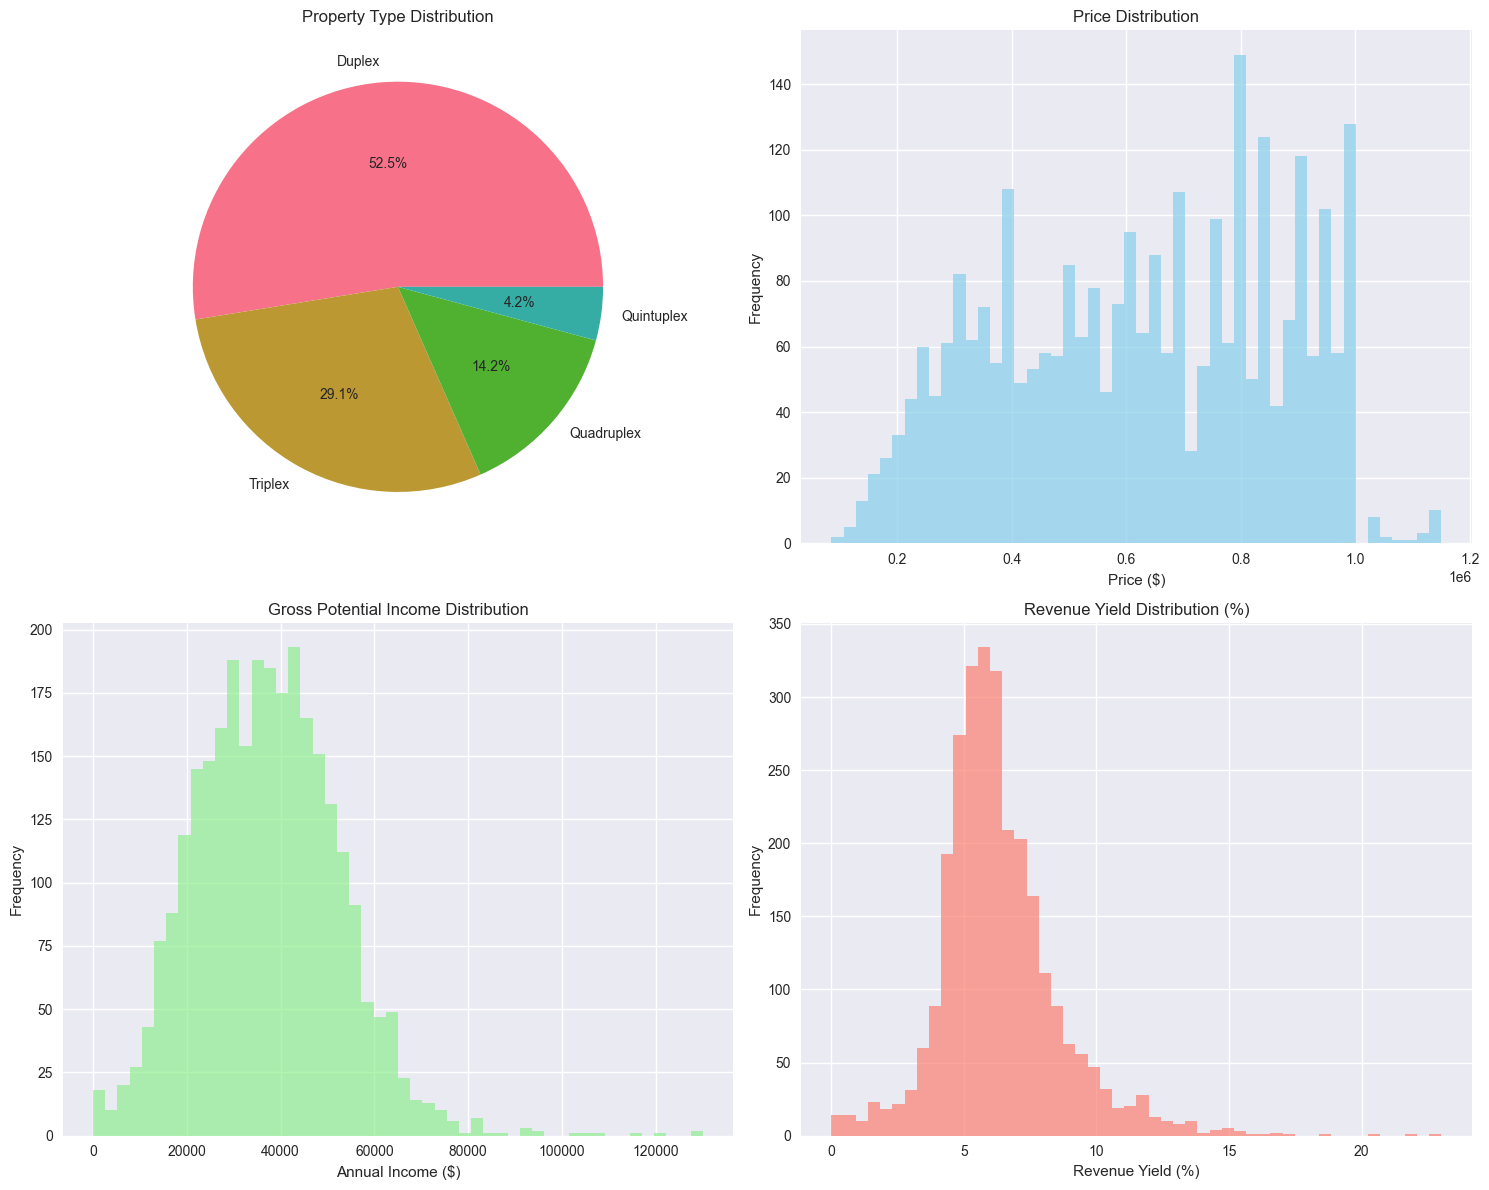

In [9]:
# Property type distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Property categories
category_counts = data['category_clean'].value_counts()
axes[0,0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Property Type Distribution')

# Price distribution
axes[0,1].hist(data['price'], bins=50, alpha=0.7, color='skyblue')
axes[0,1].set_title('Price Distribution')
axes[0,1].set_xlabel('Price ($)')
axes[0,1].set_ylabel('Frequency')

# Revenue distribution
axes[1,0].hist(data['gross_potential_income'], bins=50, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Gross Potential Income Distribution')
axes[1,0].set_xlabel('Annual Income ($)')
axes[1,0].set_ylabel('Frequency')

# Revenue yield distribution
axes[1,1].hist(data['revenue_yield'], bins=50, alpha=0.7, color='salmon')
axes[1,1].set_title('Revenue Yield Distribution (%)')
axes[1,1].set_xlabel('Revenue Yield (%)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

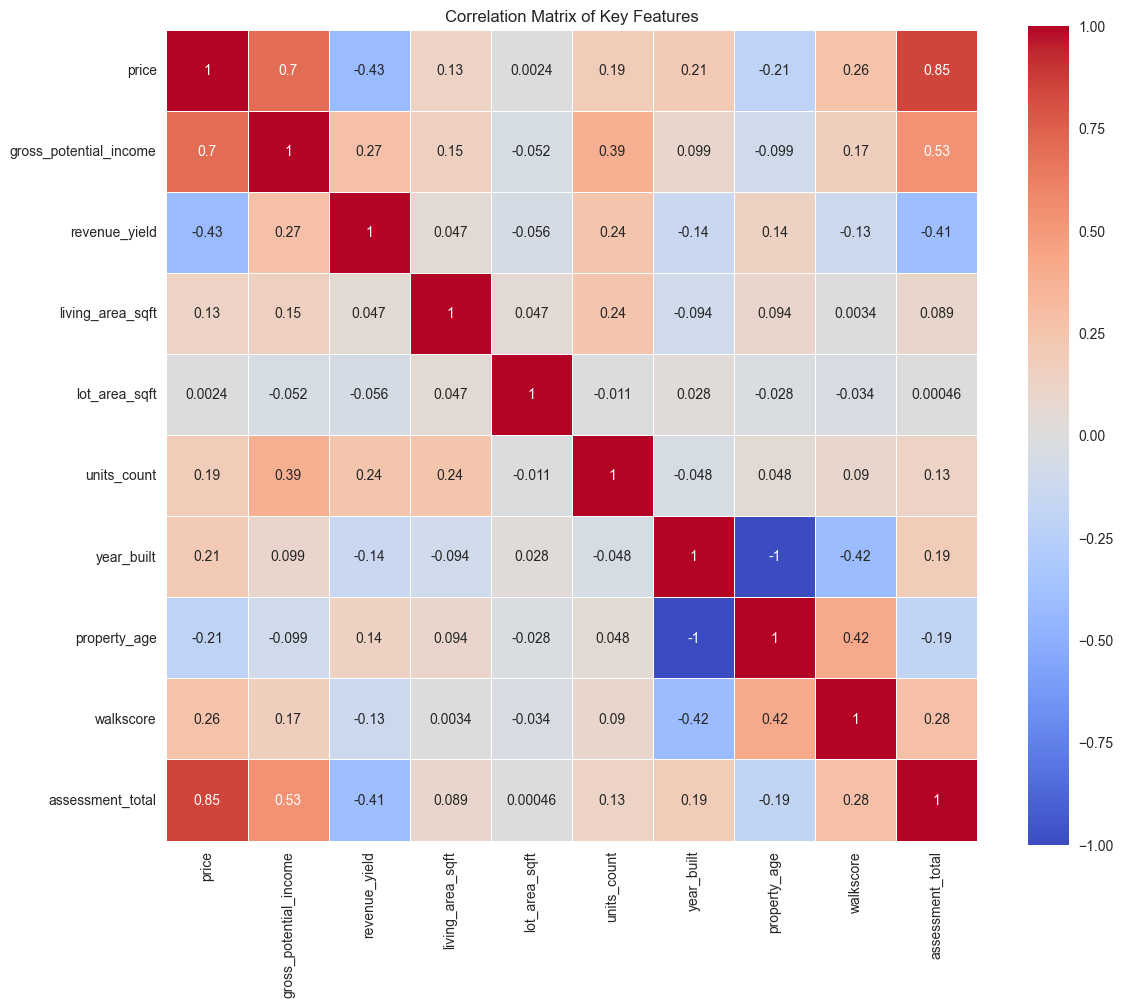

In [11]:
# Correlation matrix for key numerical features
correlation_features = ['price', 'gross_potential_income', 'revenue_yield', 
                       'living_area_sqft', 'lot_area_sqft', 'units_count', 
                       'year_built', 'property_age', 'walkscore', 'assessment_total']

# Select only available features
available_features = [col for col in correlation_features if col in data.columns]
corr_matrix = data[available_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()

In [22]:
# Geographic distribution of properties
if 'lat' in data.columns and 'lng' in data.columns:
    # Remove properties with missing coordinates
    geo_data = data.dropna(subset=['lat', 'lng'])
    
    fig = px.scatter_mapbox(
        geo_data, 
        lat='lat', 
        lon='lng',
        color='revenue_yield',
        size='price',
        hover_data=['price', 'gross_potential_income', 'category_clean'],
        color_continuous_scale='RdYlGn',
        title='Geographic Distribution of Plex Properties (Color = Revenue Yield, Size = Price)',
        mapbox_style='open-street-map',
        zoom=8
    )
    
    fig.update_layout(height=600)
    fig.show()
else:
    print("Geographic coordinates not available for mapping")

## 4. Discounted Plex Identification

In [23]:
# Calculate market benchmarks for identifying discounted properties
print("Calculating market benchmarks...")

# Overall market statistics
market_stats = {
    'median_yield': data['revenue_yield'].median(),
    'mean_yield': data['revenue_yield'].mean(),
    'q75_yield': data['revenue_yield'].quantile(0.75),
    'q25_yield': data['revenue_yield'].quantile(0.25)
}

print(f"Market Revenue Yield Statistics:")
for key, value in market_stats.items():
    print(f"{key}: {value:.2f}%")

# Calculate benchmarks by property type
category_benchmarks = data.groupby('category_clean').agg({
    'revenue_yield': ['mean', 'median'],
    'price_per_unit': ['mean', 'median'],
    'price': ['mean', 'median']
}).round(2)

print("\nBenchmarks by Property Type:")
print(category_benchmarks)

Calculating market benchmarks...
Market Revenue Yield Statistics:
median_yield: 6.00%
mean_yield: 6.32%
q75_yield: 7.33%
q25_yield: 5.01%

Benchmarks by Property Type:
               revenue_yield        price_per_unit                 price  \
                        mean median           mean     median       mean   
category_clean                                                             
Duplex                  5.93   5.79      281452.21  284950.00  575554.27   
Quadruplex              7.20   6.77      168600.63  168750.00  679037.05   
Quintuplex              7.93   7.44      128962.83  125800.00  648232.57   
Triplex                 6.36   5.87      226855.43  248772.67  685178.10   

                          
                  median  
category_clean            
Duplex          581000.0  
Quadruplex      688820.0  
Quintuplex      630000.0  
Triplex         749000.0  


In [24]:
# Identify discounted properties based on multiple criteria
print("Identifying potentially discounted properties...")

# Define criteria for discounted properties
high_yield_threshold = data['revenue_yield'].quantile(0.75)  # Top 25% yield
low_price_per_unit_threshold = data['price_per_unit'].quantile(0.25)  # Bottom 25% price per unit

# Create scoring system
data['discount_score'] = 0

# Higher yield = better deal (add points)
data.loc[data['revenue_yield'] > market_stats['q75_yield'], 'discount_score'] += 2
data.loc[data['revenue_yield'] > market_stats['median_yield'], 'discount_score'] += 1

# Lower price per unit = better deal (add points)
data.loc[data['price_per_unit'] < low_price_per_unit_threshold, 'discount_score'] += 2

# Properties with price per sqft below median (if available)
if 'price_per_sqft' in data.columns:
    median_price_sqft = data['price_per_sqft'].median()
    data.loc[data['price_per_sqft'] < median_price_sqft, 'discount_score'] += 1

# Identify top discounted properties
discounted_properties = data[data['discount_score'] >= 3].sort_values('revenue_yield', ascending=False)


Identifying potentially discounted properties...


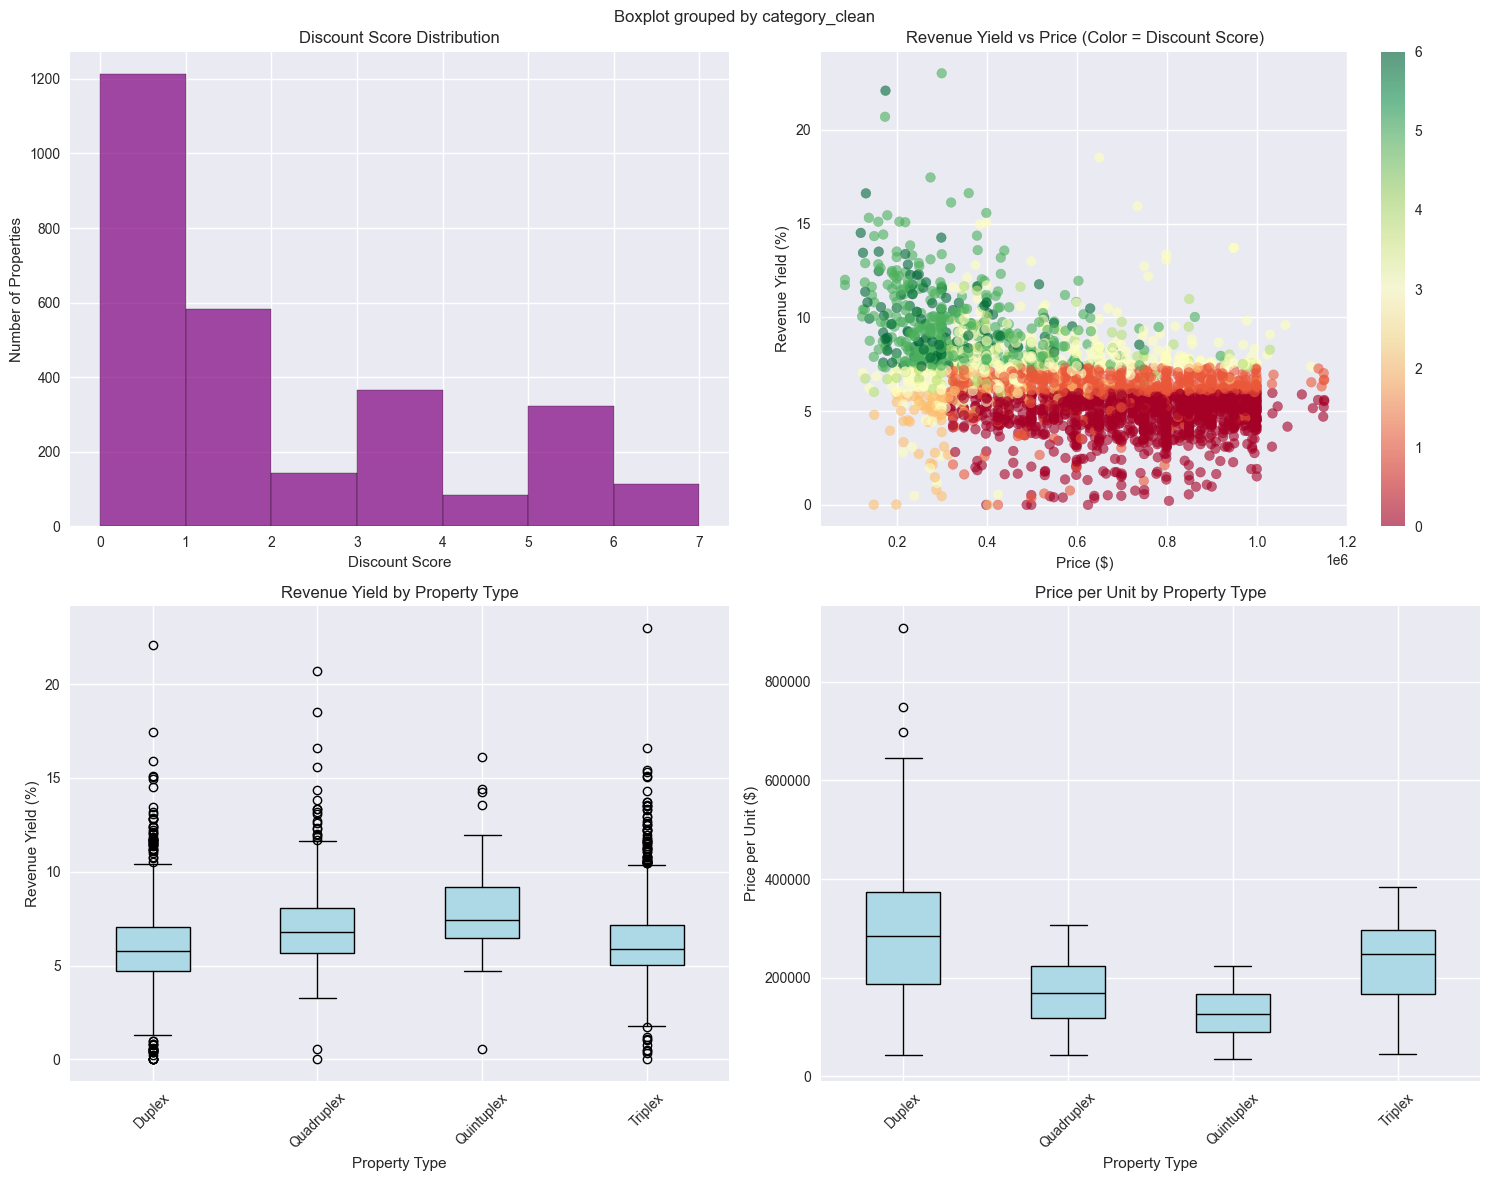

In [38]:
# Visualize discount scoring
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Discount score distribution
axes[0,0].hist(data['discount_score'], bins=range(0, int(data['discount_score'].max())+2), 
               alpha=0.7, color='purple', edgecolor='black')
axes[0,0].set_title('Discount Score Distribution')
axes[0,0].set_xlabel('Discount Score')
axes[0,0].set_ylabel('Number of Properties')

# Revenue yield vs Price scatter
scatter = axes[0,1].scatter(data['price'], data['revenue_yield'], 
                           c=data['discount_score'], cmap='RdYlGn', alpha=0.6)
axes[0,1].set_title('Revenue Yield vs Price (Color = Discount Score)')
axes[0,1].set_xlabel('Price ($)')
axes[0,1].set_ylabel('Revenue Yield (%)')
plt.colorbar(scatter, ax=axes[0,1])

# Revenue yield by property type
data.boxplot(
    column='revenue_yield',
    by='category_clean',
    ax=axes[1,0],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', edgecolor='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
axes[1,0].set_title('Revenue Yield by Property Type')
axes[1,0].set_xlabel('Property Type')
axes[1,0].set_ylabel('Revenue Yield (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Price per unit by property type
data.boxplot(
    column='price_per_unit',
    by='category_clean',
    ax=axes[1,1],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', edgecolor='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
axes[1,1].set_title('Price per Unit by Property Type')
axes[1,1].set_xlabel('Property Type')
axes[1,1].set_ylabel('Price per Unit ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 5. Revenue vs Price Regression Analysis

In [26]:
# Simple linear regression: Price vs Gross Potential Income
print("Building simple regression model: Price ~ Gross Potential Income")

# Prepare data for regression
regression_data = data.dropna(subset=['price', 'gross_potential_income'])

X_simple = regression_data[['gross_potential_income']]
y = regression_data['price']

# Split data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

# Fit simple model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

# Predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Model evaluation
r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
mae_simple = mean_absolute_error(y_test, y_pred_simple)

print(f"Simple Model Performance:")
print(f"R² Score: {r2_simple:.4f}")
print(f"RMSE: ${rmse_simple:,.0f}")
print(f"MAE: ${mae_simple:,.0f}")
print(f"Coefficient: {simple_model.coef_[0]:.2f} (price increase per $1 annual income)")
print(f"Intercept: ${simple_model.intercept_:,.0f}")

Building simple regression model: Price ~ Gross Potential Income
Simple Model Performance:
R² Score: 0.4128
RMSE: $179,484
MAE: $143,778
Coefficient: 11.17 (price increase per $1 annual income)
Intercept: $206,759


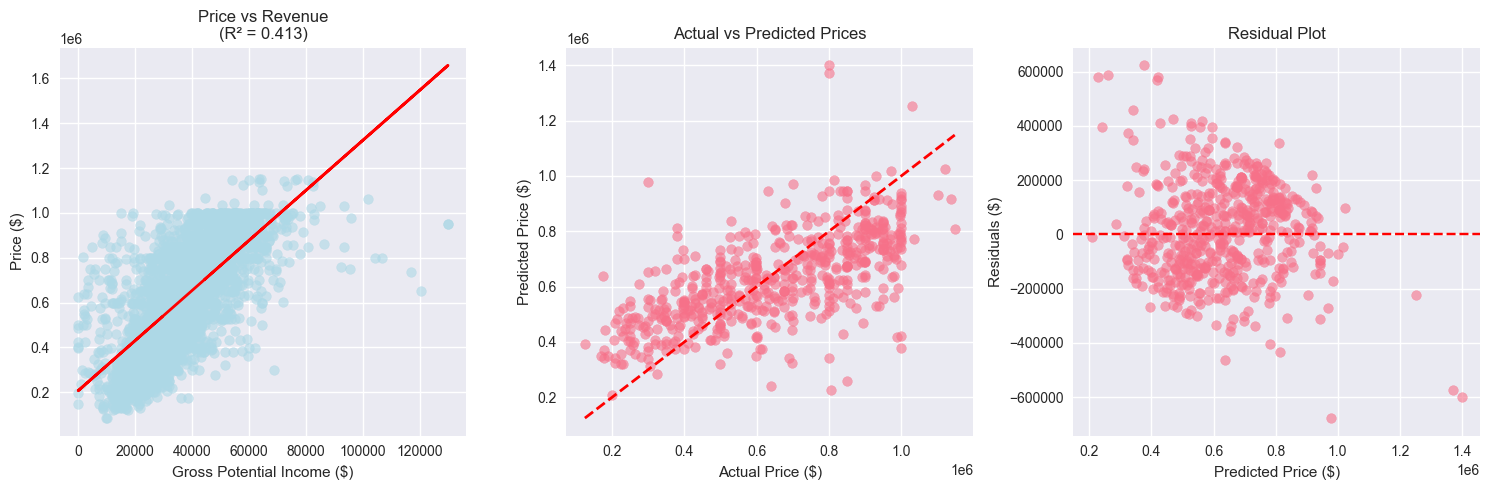

In [27]:
# Visualize simple regression
plt.figure(figsize=(15, 5))

# Scatter plot with regression line
plt.subplot(1, 3, 1)
plt.scatter(regression_data['gross_potential_income'], regression_data['price'], 
           alpha=0.6, color='lightblue')
plt.plot(regression_data['gross_potential_income'], 
         simple_model.predict(regression_data[['gross_potential_income']]), 
         color='red', linewidth=2)
plt.xlabel('Gross Potential Income ($)')
plt.ylabel('Price ($)')
plt.title(f'Price vs Revenue\n(R² = {r2_simple:.3f})')

# Actual vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_simple, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')

# Residuals plot
plt.subplot(1, 3, 3)
residuals = y_test - y_pred_simple
plt.scatter(y_pred_simple, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

## 6. Enhanced Model with Additional Features

In [28]:
# Prepare enhanced feature set
print("Building enhanced regression model with additional features...")

# Select features for enhanced model
feature_columns = ['gross_potential_income', 'units_count', 'living_area_sqft', 
                  'lot_area_sqft', 'year_built', 'property_age']

# Add categorical features
categorical_features = ['category_clean']

# Select only available features
available_features = [col for col in feature_columns if col in data.columns and data[col].notna().sum() > 0]
available_categorical = [col for col in categorical_features if col in data.columns]

print(f"Available numerical features: {available_features}")
print(f"Available categorical features: {available_categorical}")

# Create enhanced dataset
enhanced_data = data[available_features + available_categorical + ['price']].copy()
enhanced_data = enhanced_data.dropna()

print(f"Enhanced dataset size: {enhanced_data.shape[0]} properties")

Building enhanced regression model with additional features...
Available numerical features: ['gross_potential_income', 'units_count', 'living_area_sqft', 'lot_area_sqft', 'year_built', 'property_age']
Available categorical features: ['category_clean']
Enhanced dataset size: 671 properties


In [29]:
# Prepare features for enhanced model
X_enhanced = enhanced_data[available_features].copy()

# Add categorical features using one-hot encoding
if available_categorical:
    for cat_col in available_categorical:
        # Create dummy variables
        dummies = pd.get_dummies(enhanced_data[cat_col], prefix=cat_col)
        X_enhanced = pd.concat([X_enhanced, dummies], axis=1)

y_enhanced = enhanced_data['price']

print(f"Enhanced feature matrix shape: {X_enhanced.shape}")
print(f"Enhanced features: {list(X_enhanced.columns)}")

Enhanced feature matrix shape: (671, 10)
Enhanced features: ['gross_potential_income', 'units_count', 'living_area_sqft', 'lot_area_sqft', 'year_built', 'property_age', 'category_clean_Duplex', 'category_clean_Quadruplex', 'category_clean_Quintuplex', 'category_clean_Triplex']


In [30]:
# Split and train enhanced model
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Fit enhanced linear regression model
enhanced_model = LinearRegression()
enhanced_model.fit(X_train_enh, y_train_enh)

# Predictions
y_pred_enhanced = enhanced_model.predict(X_test_enh)

# Model evaluation
r2_enhanced = r2_score(y_test_enh, y_pred_enhanced)
rmse_enhanced = np.sqrt(mean_squared_error(y_test_enh, y_pred_enhanced))
mae_enhanced = mean_absolute_error(y_test_enh, y_pred_enhanced)

print(f"Enhanced Model Performance:")
print(f"R² Score: {r2_enhanced:.4f}")
print(f"RMSE: ${rmse_enhanced:,.0f}")
print(f"MAE: ${mae_enhanced:,.0f}")

Enhanced Model Performance:
R² Score: 0.2776
RMSE: $213,809
MAE: $144,747


Feature Importance (by absolute coefficient):
                     feature   coefficient  abs_coefficient
8  category_clean_Quintuplex -93326.322148     93326.322148
6      category_clean_Duplex  69745.756457     69745.756457
9     category_clean_Triplex  44545.171168     44545.171168
7  category_clean_Quadruplex -20964.605477     20964.605477
1                units_count  10848.419927     10848.419927
5               property_age   -183.257667       183.257667
4                 year_built    183.257667       183.257667
0     gross_potential_income     12.999887        12.999887
2           living_area_sqft      4.670961         4.670961
3              lot_area_sqft     -1.444301         1.444301


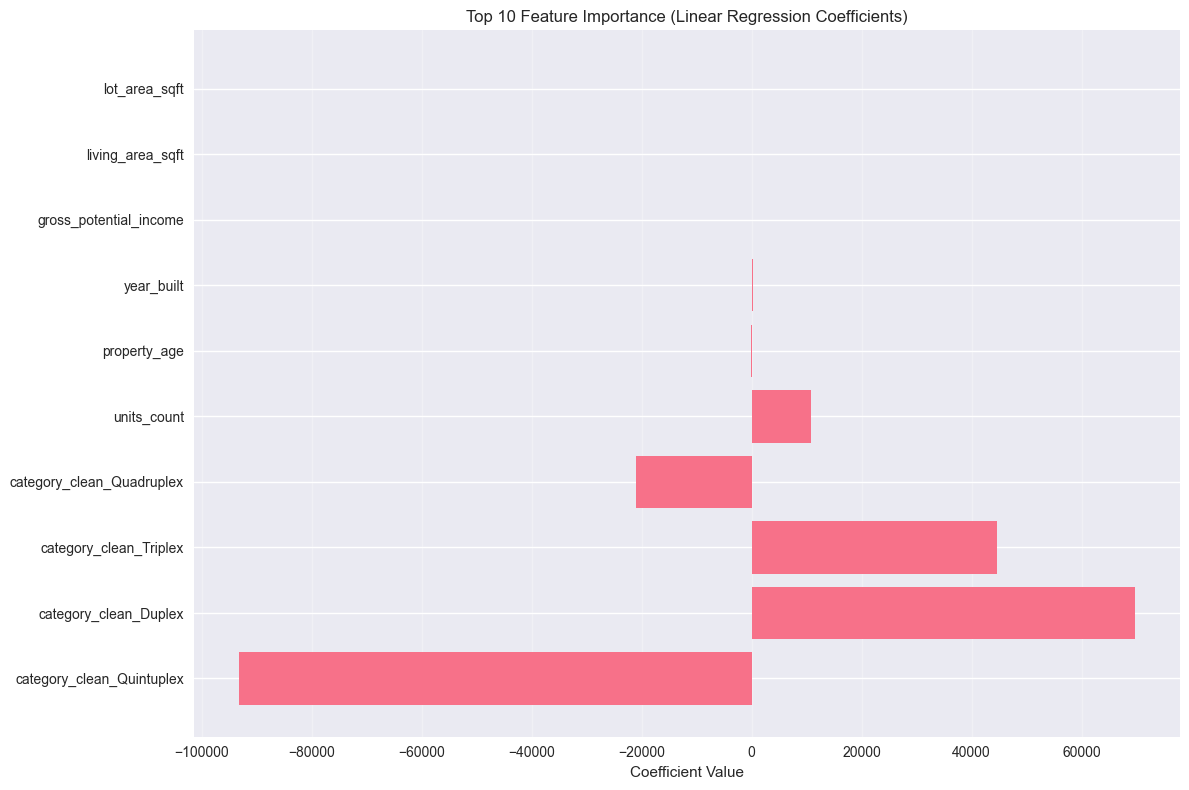

In [31]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_enhanced.columns,
    'coefficient': enhanced_model.coef_,
    'abs_coefficient': np.abs(enhanced_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("Feature Importance (by absolute coefficient):")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['coefficient'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Importance (Linear Regression Coefficients)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
# Try Random Forest for comparison
print("Training Random Forest model for comparison...")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_enh, y_train_enh)

# Predictions
y_pred_rf = rf_model.predict(X_test_enh)

# Model evaluation
r2_rf = r2_score(y_test_enh, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_enh, y_pred_rf))
mae_rf = mean_absolute_error(y_test_enh, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: ${rmse_rf:,.0f}")
print(f"MAE: ${mae_rf:,.0f}")

# Random Forest feature importance
rf_importance = pd.DataFrame({
    'feature': X_enhanced.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance.head(10))

Training Random Forest model for comparison...
Random Forest Model Performance:
R² Score: 0.6753
RMSE: $143,330
MAE: $115,813

Random Forest Feature Importance:
                     feature  importance
0     gross_potential_income    0.698273
3              lot_area_sqft    0.117771
2           living_area_sqft    0.076515
4                 year_built    0.037243
5               property_age    0.036100
1                units_count    0.014185
9     category_clean_Triplex    0.005929
8  category_clean_Quintuplex    0.005557
6      category_clean_Duplex    0.005136
7  category_clean_Quadruplex    0.003291


## 7. Model Evaluation and Comparison

Model Comparison:
                          Model  R² Score         RMSE          MAE
0  Simple Linear (Revenue only)    0.4128  179483.6494  143778.3166
1               Enhanced Linear    0.2776  213808.9342  144747.3151
2                 Random Forest    0.6753  143330.3314  115812.6119


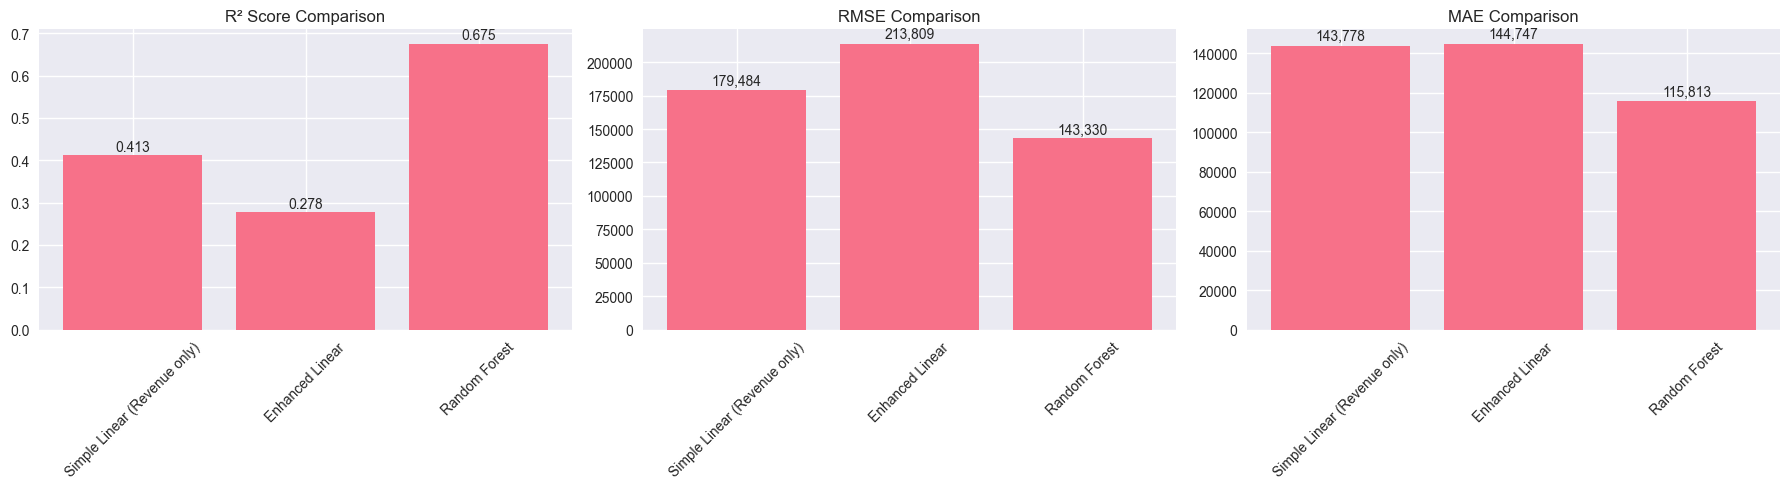

In [33]:
# Compare all models
model_comparison = pd.DataFrame({
    'Model': ['Simple Linear (Revenue only)', 'Enhanced Linear', 'Random Forest'],
    'R² Score': [r2_simple, r2_enhanced, r2_rf],
    'RMSE': [rmse_simple, rmse_enhanced, rmse_rf],
    'MAE': [mae_simple, mae_enhanced, mae_rf]
})

print("Model Comparison:")
print(model_comparison.round(4))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['R² Score', 'RMSE', 'MAE']
for i, metric in enumerate(metrics):
    axes[i].bar(model_comparison['Model'], model_comparison[metric])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for j, v in enumerate(model_comparison[metric]):
        if metric == 'R² Score':
            axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center')
        else:
            axes[i].text(j, v + v*0.02, f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

Best performing model: Random Forest


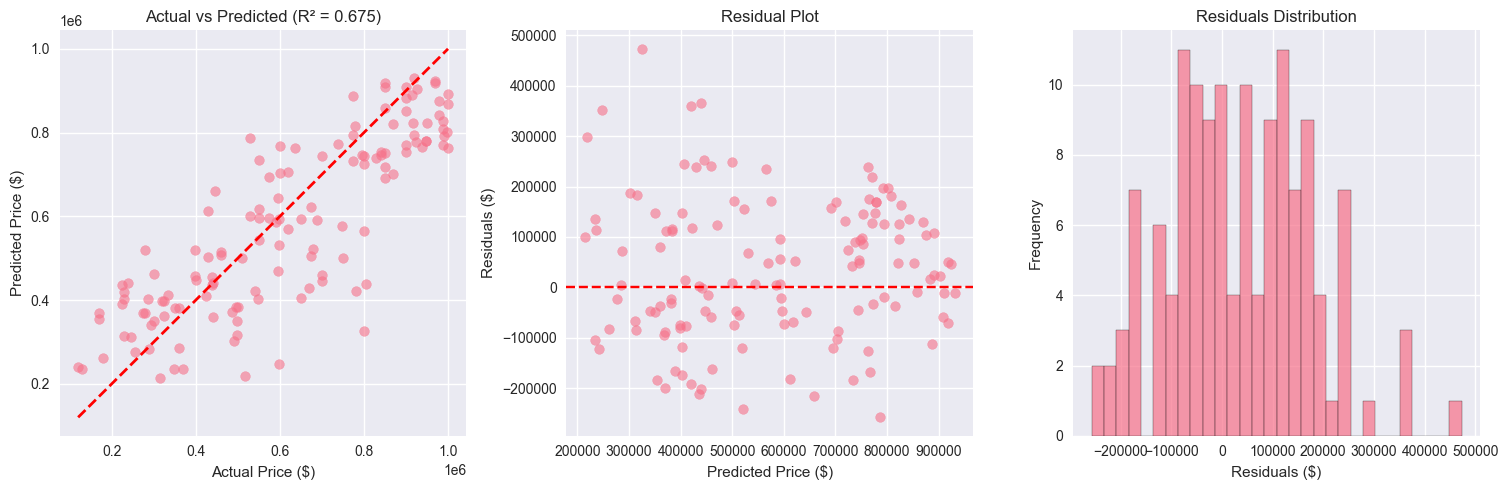

In [34]:
# Residual analysis for best model
best_model_name = model_comparison.loc[model_comparison['R² Score'].idxmax(), 'Model']
print(f"Best performing model: {best_model_name}")

# Use Random Forest predictions for analysis (assuming it's the best)
plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test_enh, y_pred_rf, alpha=0.6)
plt.plot([y_test_enh.min(), y_test_enh.max()], [y_test_enh.min(), y_test_enh.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Actual vs Predicted (R² = {r2_rf:.3f})')

# Residuals
plt.subplot(1, 3, 2)
residuals_rf = y_test_enh - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')

# Residuals histogram
plt.subplot(1, 3, 3)
plt.hist(residuals_rf, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()

## 8. Visualization of Results

In [35]:
# Identify properties with highest prediction errors (potential outliers or unique opportunities)
enhanced_data_with_predictions = enhanced_data.copy()
full_predictions = rf_model.predict(X_enhanced)
enhanced_data_with_predictions['predicted_price'] = full_predictions
enhanced_data_with_predictions['prediction_error'] = enhanced_data_with_predictions['price'] - enhanced_data_with_predictions['predicted_price']
enhanced_data_with_predictions['error_percentage'] = (enhanced_data_with_predictions['prediction_error'] / enhanced_data_with_predictions['price']) * 100

# Properties priced below model prediction (potential bargains)
undervalued = enhanced_data_with_predictions[enhanced_data_with_predictions['prediction_error'] < -50000].sort_values('prediction_error')
overvalued = enhanced_data_with_predictions[enhanced_data_with_predictions['prediction_error'] > 50000].sort_values('prediction_error', ascending=False)

print(f"Found {len(undervalued)} potentially undervalued properties (priced $50k+ below model)")
print(f"Found {len(overvalued)} potentially overvalued properties (priced $50k+ above model)")

if len(undervalued) > 0:
    print("\nTop 10 Potentially Undervalued Properties:")
    undervalued_display = undervalued[['price', 'predicted_price', 'prediction_error', 'gross_potential_income']].head(10)
    print(undervalued_display.round(0))

Found 130 potentially undervalued properties (priced $50k+ below model)
Found 148 potentially overvalued properties (priced $50k+ above model)

Top 10 Potentially Undervalued Properties:
       price  predicted_price  prediction_error  gross_potential_income
1187  529000         786257.0         -257257.0                 47400.0
2275  279000         519948.0         -240948.0                 24300.0
2520  445000         659230.0         -214230.0                 42960.0
1511  224800         436173.0         -211373.0                 28800.0
904   239000         440124.0         -201124.0                 20100.0
423   170000         369903.0         -199903.0                 12900.0
196   229500         420366.0         -190866.0                 26460.0
557   169900         353912.0         -184012.0                 15600.0
1979  549900         733675.0         -183775.0                 32700.0
2290  430000         612354.0         -182354.0                 38700.0


In [48]:
# Create comprehensive visualization dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Revenue Yield vs Price', 'Prediction Accuracy', 'Geographic Distribution', 'Model Performance'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"type": "scattermapbox"}, {"type": "bar"}]]
)

# Revenue Yield vs Price with discount scoring
fig.add_trace(
    go.Scatter(
        x=data['price'],
        y=data['revenue_yield'],
        mode='markers',
        marker=dict(
            size=8,
            color=data['discount_score'],
            colorscale='RdYlGn',
            showscale=True,
            colorbar=dict(title="Discount Score")
        ),
        text=data['category_clean'],
        name='Properties'
    ),
    row=1, col=1
)

# Prediction accuracy
fig.add_trace(
    go.Scatter(
        x=enhanced_data_with_predictions['price'],
        y=enhanced_data_with_predictions['predicted_price'],
        mode='markers',
        marker=dict(size=6, opacity=0.6),
        name='Predictions'
    ),
    row=1, col=2
)

# Add perfect prediction line
min_price = min(enhanced_data_with_predictions['price'].min(), enhanced_data_with_predictions['predicted_price'].min())
max_price = max(enhanced_data_with_predictions['price'].max(), enhanced_data_with_predictions['predicted_price'].max())
fig.add_trace(
    go.Scatter(
        x=[min_price, max_price],
        y=[min_price, max_price],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Perfect Prediction'
    ),
    row=1, col=2
)

# Geographic distribution (if coordinates available)
if 'lat' in data.columns and 'lng' in data.columns:
    geo_data = data.dropna(subset=['lat', 'lng'])
    fig.add_trace(
        go.Scattermapbox(
            lat=geo_data['lat'],
            lon=geo_data['lng'],
            mode='markers',
            marker=dict(
                size=geo_data['revenue_yield'],
                color=geo_data['discount_score'],
                colorscale='RdYlGn',
                sizemode='diameter',
                sizeref=2*max(geo_data['revenue_yield'])/(40**2),
                sizemin=4
            ),
            text=geo_data['address'],
            name='Properties'
        ),
        row=2, col=1
    )

# Model performance comparison
fig.add_trace(
    go.Bar(
        x=model_comparison['Model'],
        y=model_comparison['R² Score'],
        name='R² Score'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    title_text="Plex Property Analysis Dashboard",
    showlegend=False
)

# Update x and y axis labels
fig.update_xaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Revenue Yield (%)", row=1, col=1)
fig.update_xaxes(title_text="Actual Price ($)", row=1, col=2)
fig.update_yaxes(title_text="Predicted Price ($)", row=1, col=2)
fig.update_yaxes(title_text="R² Score", row=2, col=2)

# Update mapbox
if 'lat' in data.columns and 'lng' in data.columns:
    fig.update_layout(
        mapbox=dict(
            style="open-street-map",
            center=dict(lat=geo_data['lat'].mean(), lon=geo_data['lng'].mean()),
            zoom=8
        )
    )

fig.show()